In [1]:
import pandas as pd
import numpy as np
import os

# Set working dir to project root dir
os.chdir(os.path.abspath(os.path.join(os.getcwd(), "..")))
print(f"Changed working directory to: {os.getcwd()}")

# Set abs path to data
project_root = "/Users/oliulv/Documents/foak"
data_path = os.path.join(project_root, "data", "SOLUSDT_5m_1h-pump05_200811_250302.csv")

# Load data into df
df = pd.read_csv(data_path, parse_dates=["timestamp"])
df.head()

Changed working directory to: /Users/oliulv/Documents/foak


,timestamp,open,high,low,close,volume,num_trades,taker_buy_base,taker_buy_quote,label,...,volatility_cluster,buy_sell_ratio,bid_ask_spread,depth_imbalance,fractal_dimension,fib_retrace_38,fib_retrace_50,order_flow_imbalance,rolling_kurtosis,lunar_phase
0,2020-08-11 06:00:00,2.8500,3.4700,2.8500,3.1852,3727.86,9.0,3694.45,11209.636229,0,...,NaN,110.579168,0.194650,0.991038,NaN,NaN,NaN,0.982076,NaN,0.37931
1,2020-08-11 06:05:00,3.1846,3.4700,3.1846,3.1846,2282.99,34.0,1162.73,3737.175189,0,...,NaN,1.037911,0.089619,0.509301,NaN,NaN,NaN,0.018603,NaN,0.37931
2,2020-08-11 06:10:00,3.1655,3.1655,3.1655,3.1655,104.97,2.0,0.00,0.000000,0,...,NaN,0.000000,0.000000,0.000000,NaN,NaN,NaN,-1.000000,NaN,0.37931
3,2020-08-11 06:15:00,3.1655,3.3564,3.1358,3.3564,237.93,8.0,30.00,100.692000,0,...,NaN,0.144279,0.065725,0.126088,NaN,NaN,NaN,-0.747825,NaN,0.37931
4,2020-08-11 06:20:00,3.1993,3.3564,3.1500,3.1500,2308.50,23.0,1985.96,6410.516452,0,...,NaN,6.157252,0.065524,0.860282,NaN,NaN,NaN,0.720563,NaN,0.37931


In [2]:
from utils.model.model_manager import ModelManager

# Init manager
symbol = "SOLUSDT"
start_date = "2020-08-11"
end_date = "2025-03-02"
manager = ModelManager(symbol, start_date, end_date)

# Load data into manager
manager.load_data(data_path)

# Prepare and split data
test_window_days = 30
manager.split_data(test_window_days)

🕵️♂️ Dataset loaded successfully
📊 Data split completed


(            open      high       low     close    volume  num_trades  \
 0         2.8500    3.4700    2.8500    3.1852  3727.860         9.0   
 1         3.1846    3.4700    3.1846    3.1846  2282.990        34.0   
 2         3.1655    3.1655    3.1655    3.1655   104.970         2.0   
 3         3.1655    3.3564    3.1358    3.3564   237.930         8.0   
 4         3.1993    3.3564    3.1500    3.1500  2308.500        23.0   
 ...          ...       ...       ...       ...       ...         ...   
 470228  239.7400  239.9000  239.5300  239.6800  2090.155      3214.0   
 470229  239.6800  239.9800  239.6200  239.8700  1459.245      3273.0   
 470230  239.8800  239.8800  239.4000  239.5800  3298.216      3742.0   
 470231  239.5900  239.6700  238.8900  239.0900  5556.545      5825.0   
 470232  239.0900  239.2500  238.3000  238.3100  8082.747      6508.0   
 
         taker_buy_base  taker_buy_quote    1m_roc  30m_volatility  ...  \
 0             3694.450     11209.636229  0.000

In [3]:
# Config model with default params
manager.configure_model()

# Fit and evaluate model on data
manager.fit_and_evaluate()

# Tune threshold
manager.tune_threshold(min_recall=0.6, min_precision=0.7)


🏋️ Training model...

🎯 Tuning threshold...
Optimal threshold: 0.7263


np.float64(0.726297806448942)

In [4]:
# Get and print merics
metrics = manager.get_metrics()
print(metrics)


📊 Model Performance Report
Optimal Threshold: 0.7263
AUC-ROC Score: 0.9836

Overall Metrics:
Accuracy:  0.9707
Precision: 0.9684
Recall:    0.9707
F1-Score:  0.9686

Class 0 Metrics:
Precision: 0.9772
Recall:    0.9922
F1-Score:  0.9846

Class 1 Metrics:
Precision: 0.8161
Recall:    0.6004
F1-Score:  0.6918

Using raw probabilities
Classification threshold: 0.7263
{'accuracy': 0.9707209813678972, 'precision': 0.9683902652919157, 'recall': 0.9707209813678972, 'f1': 0.9686032351730651, 'auc_roc': np.float64(0.9836082334402494), 'optimal_threshold': np.float64(0.726297806448942), 'precision_0': 0.9772096949234294, 'recall_0': 0.9921645445641528, 'f1_0': 0.9846303383755544, 'precision_1': 0.8160919540229885, 'recall_1': 0.6004228329809725, 'f1_1': 0.6918392204628502}



🎯 Generating SHAP analysis...


/Users/oliulv/Documents/foak/venv/lib/python3.12/site-packages/shap/explainers/_tree.py:448: UserWarning: LightGBM binary classifier with TreeExplainer shap values output has changed to a list of ndarray
  warnings.warn('LightGBM binary classifier with TreeExplainer shap values output has changed to a list of ndarray')


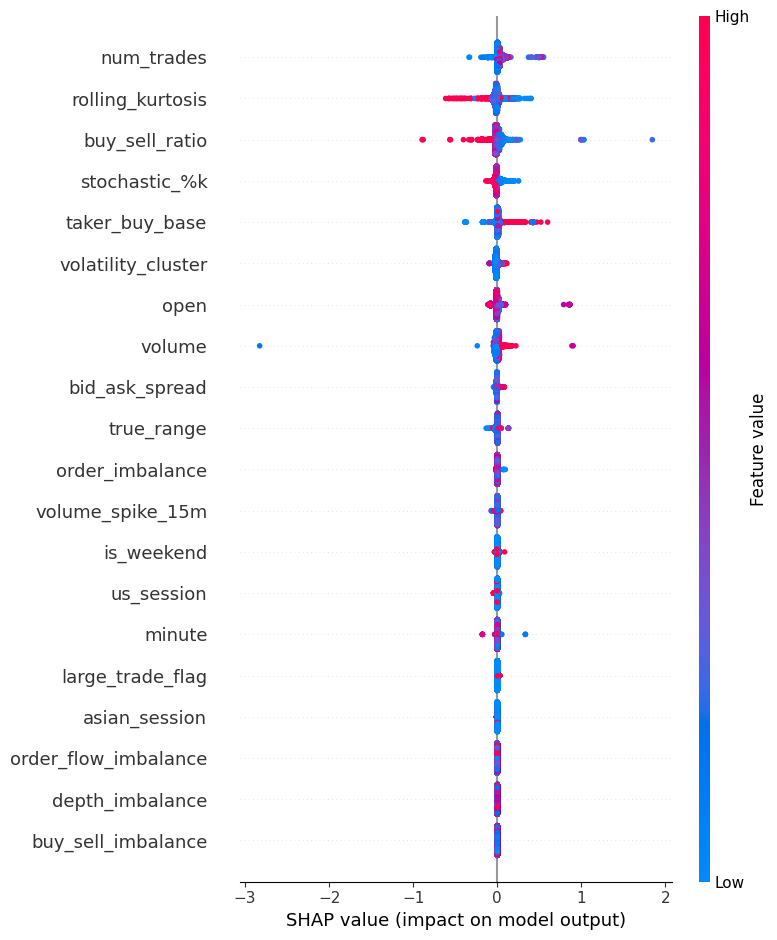


📈 Calculating feature importance...


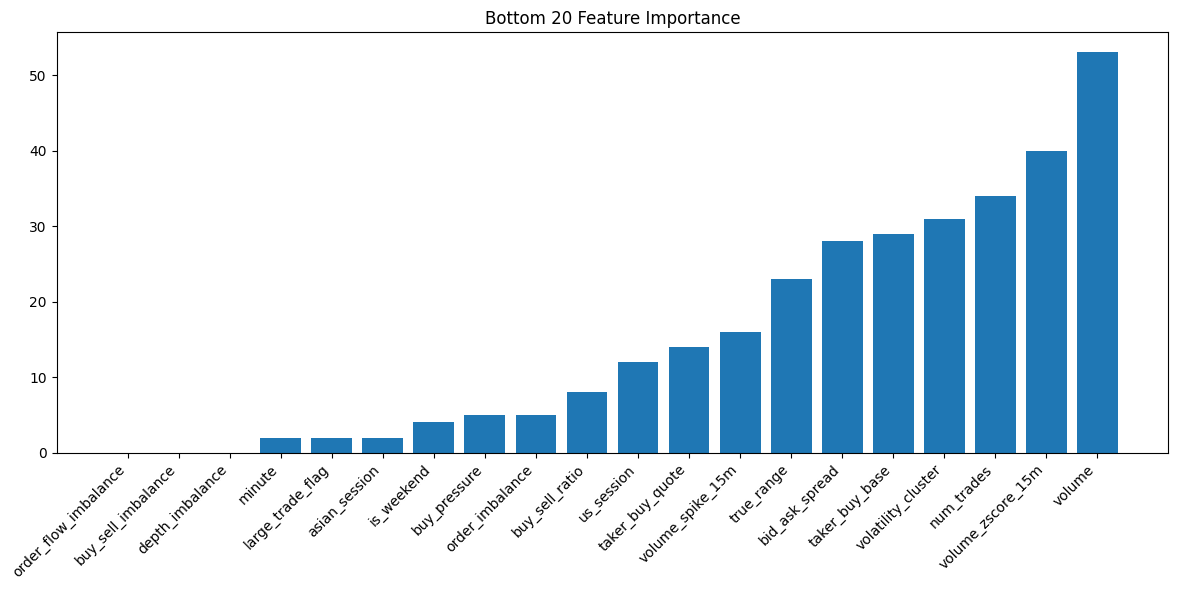

Found existing experiment
Identical result already exists for experiment ID: 24
Logged feature importance for experiment ID: 24


In [5]:
# Get and plot shap analysis
shap_values = manager.shap_analysis(show_bottom=True, n_features=20)

# Get and plot feature analysis
lgbm_values = manager.feature_importance(show_bottom=True, n_features=20)

# Init tracker
from utils.model.experiment_tracker import ExperimentTracker

# Log experiment, results, and feature analysis metrics
with ExperimentTracker() as tracker:

    # Log experiment details
    experiment = tracker.get_or_create_experiment(
        symbol=symbol,
        frequency="5m",
        target_variable="1h-pump05",
        hyperparameters=manager.model.get_params(),
        features=manager.X_train.columns.tolist()
    )

    # Log experiment results
    results = tracker.log_results(experiment, metrics, test_window_days)

    # Log feature analysis metrics
    tracker.log_feature_importance(experiment, results, shap_values, lgbm_values)

In [ ]:
from utils.model.walk_forward import WalkForwardAnalyzer

# Store org params for logging
org_params = manager.model.get_params()

# Init wf
wf = WalkForwardAnalyzer(
    0.3,
    0.07,
    manager.optimal_threshold)

# Config model for wf
manager.configure_walk_forward_model()

# Prepare featuers
X = manager.df.drop(columns=["label"])
y = manager.df["label"]

# wf val
predictions, true_labels, metrics_history = wf.validate(
    manager.model,
    X,
    y)

In [ ]:
from utils.model.experiment_tracker import ExperimentTracker

# Initialize tracker

with ExperimentTracker() as tracker:

    # Log experiment details
    experiment = tracker.get_or_create_experiment(
        symbol=symbol,
        frequency="5m",
        target_variable="1h-pump05",
        hyperparameters=org_params,
        features=manager.X_train.columns.tolist()
    )

    # Log results
    tracker.log_results(experiment, metrics, test_window_days)

    # Log wf val results
    tracker.log_walk_forward_results(experiment, metrics_history, 0.3, 0.07)

In [ ]:
wf.plot_metrics_over_time()